In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb
import seaborn as sns
import catboost

import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [29]:
data = pd.read_csv('D:\SunBase Data Intern\customer_churn_large_dataset.csv')
data = data.drop(columns=['Name', 'CustomerID'])
data.head()
# print(data.shape)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [30]:
# #NOrmalisation

# scaler = MinMaxScaler()
# data[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']] = scaler.fit_transform(data[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']])
# data.head()

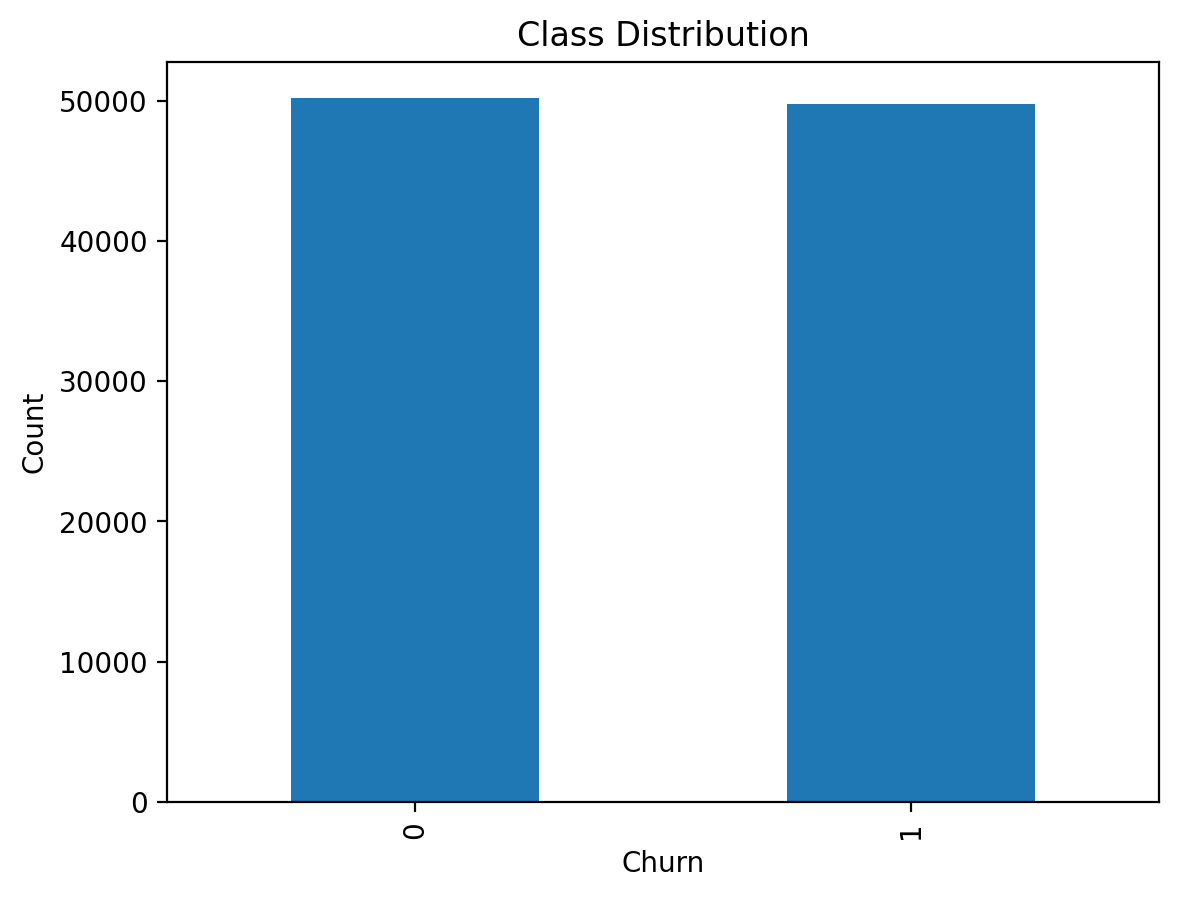

In [31]:
data.isnull().sum()

data['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [32]:
csv_X = data.drop('Churn', axis=1)
csv_X.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,Male,Los Angeles,17,73.36,236
1,62,Female,New York,1,48.76,172
2,24,Female,Los Angeles,5,85.47,460
3,36,Female,Miami,3,97.94,297
4,46,Female,Miami,19,58.14,266


In [33]:
# X = data.drop(columns=['Churn'])
csv_y = data['Churn']
# X.head()
csv_y.head()


0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [34]:
# # Encoding the categorical data
# unique = X['Location'].unique()
# # print(uniqe)

X = pd.DataFrame(csv_X)
y = pd.DataFrame(csv_y).values.ravel()

X['Gender'] = X['Gender'].astype('category')
X['Location'] = X['Location'].astype('category')


# y.head()

# Performing one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['Gender', 'Location'])
X_encoded.head()


,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,False,True,False,False,True,False,False
1,62,1,48.76,172,True,False,False,False,False,False,True
2,24,5,85.47,460,True,False,False,False,True,False,False
3,36,3,97.94,297,True,False,False,False,False,True,False
4,46,19,58.14,266,True,False,False,False,False,True,False


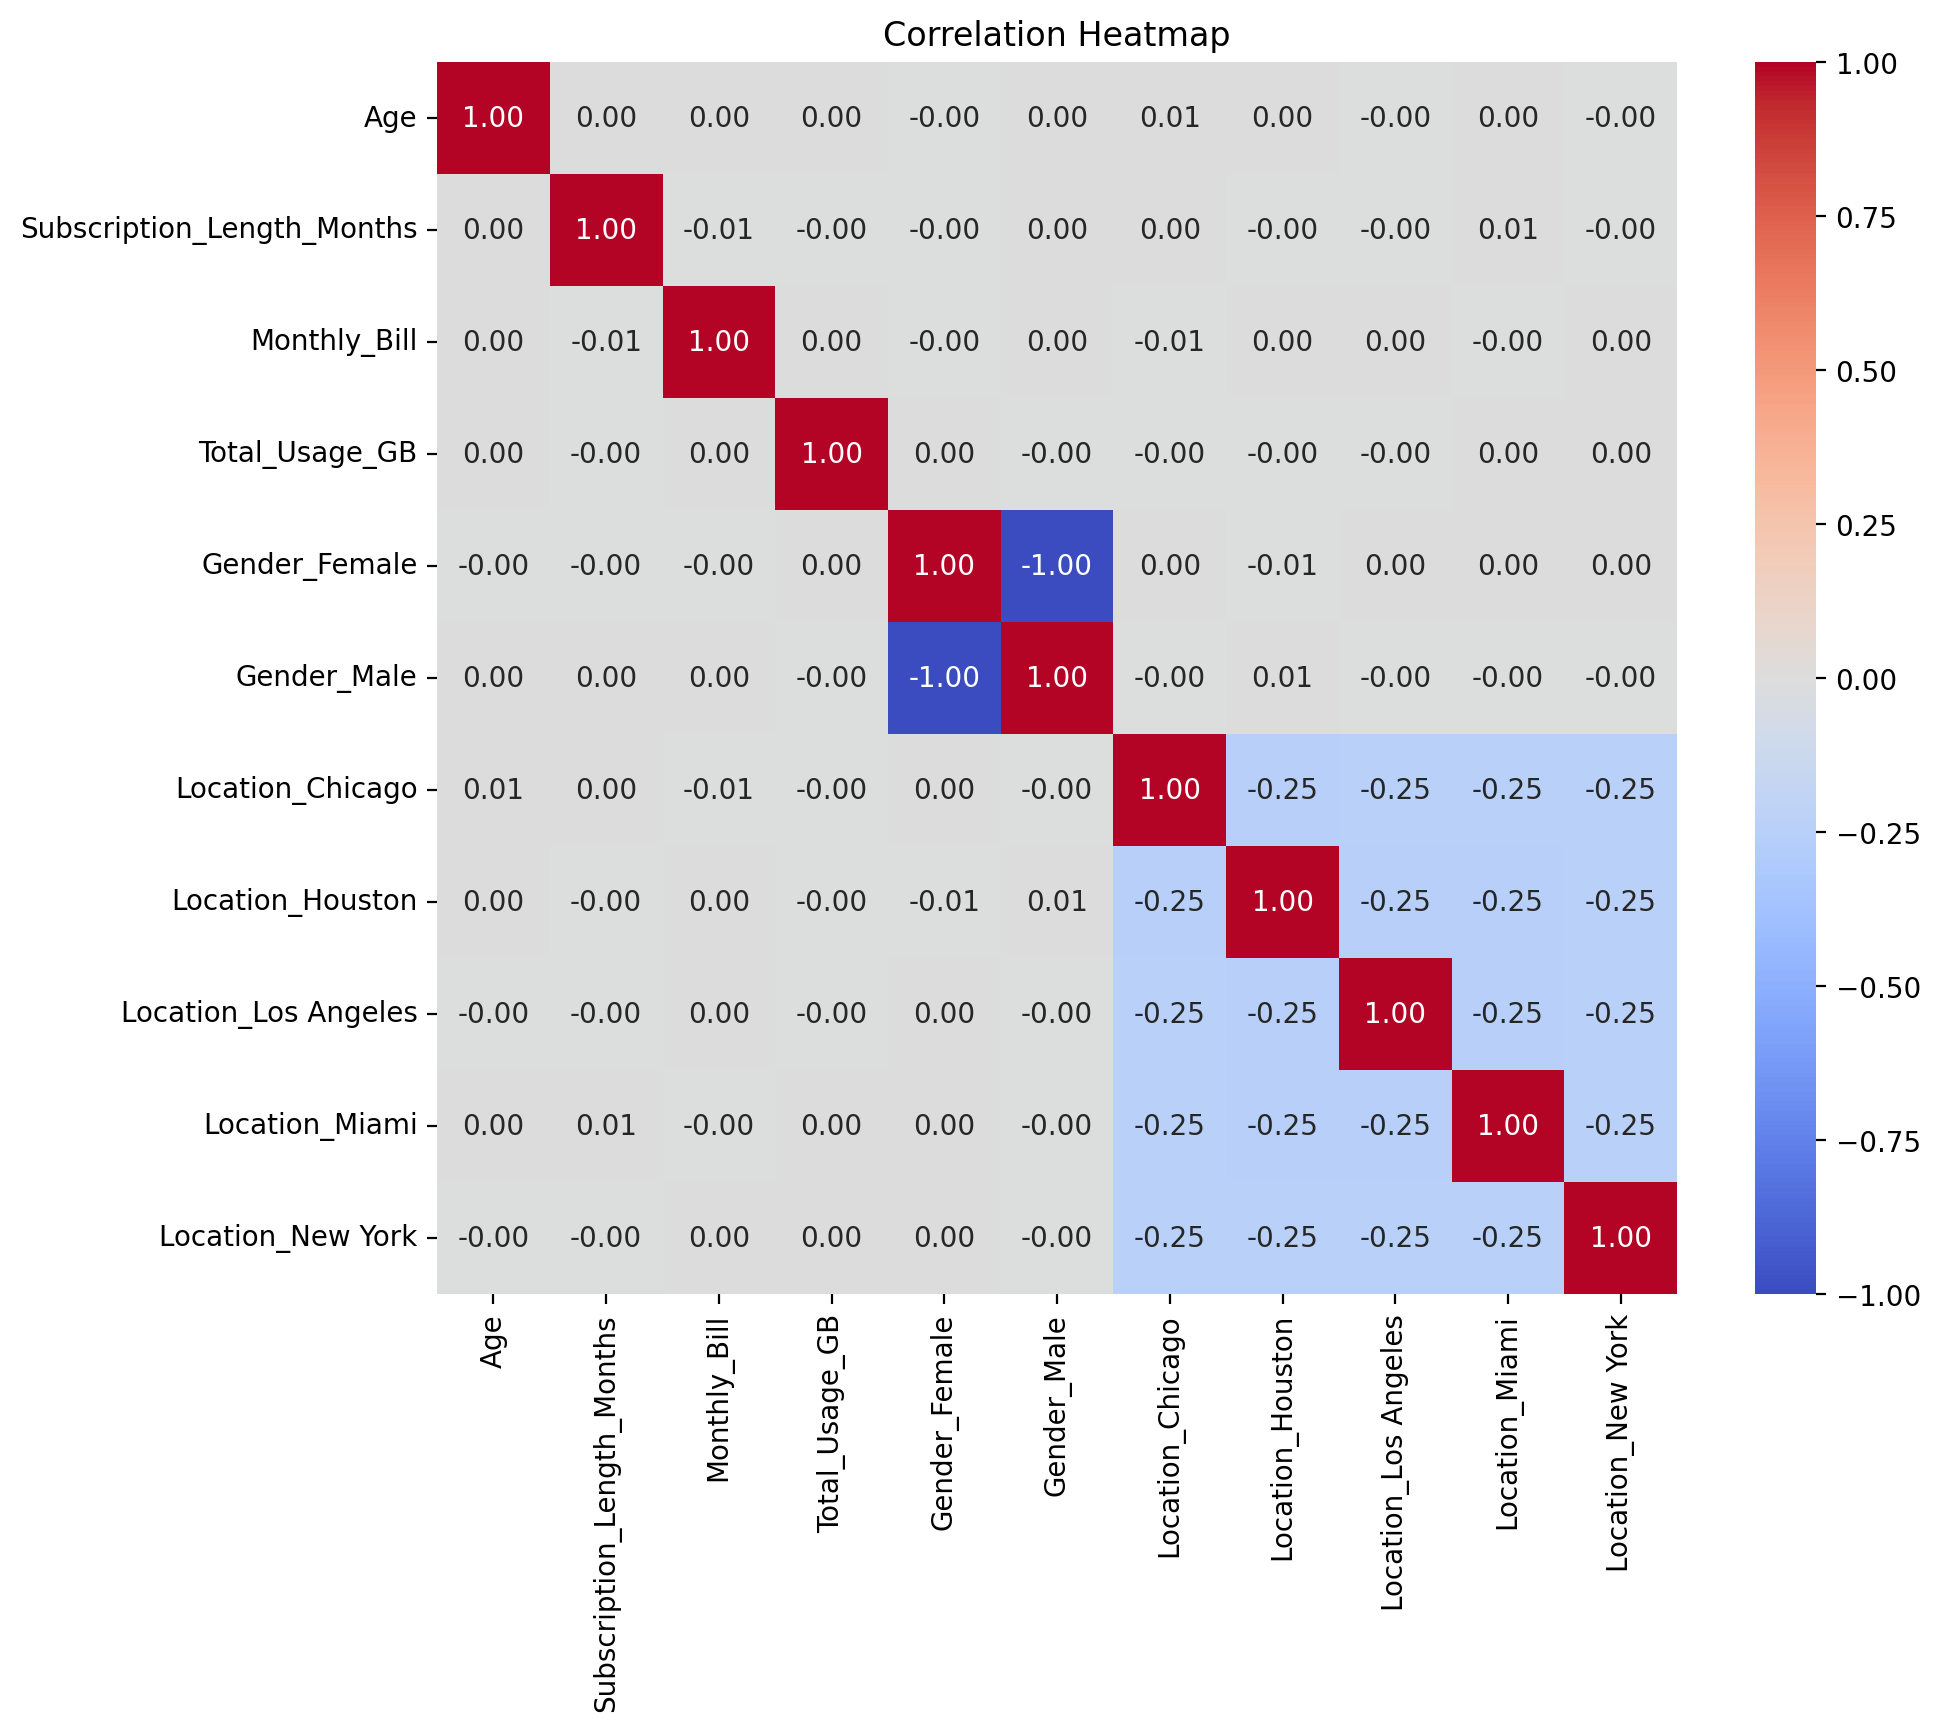

In [35]:
#Spliting dataset into three parts: a training set, a validation set, and a test set.
#A common split is 70% for training, 15% for validation, and 15% for testing.
# Calculate correlations
correlation_matrix = X_encoded.corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [48]:
# # Create an XGBoost Classifier model
# xgb_model = xgb.XGBClassifier(random_state=42)


# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [50, 100, 200],
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_encoded, y)

# # Get the best parameters and estimator from the grid search
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# print("Best Parameters:", best_params)
# print("Best Estimator:", best_estimator)



# # xgb_model.fit(X_train, y_train)

# # # Perform cross-validation
# # num_folds = 8  # Number of cross-validation folds
# # scores = cross_val_score(xgb_model, X_encoded, y, cv=num_folds, scoring='accuracy')7 .0
# # # Print the cross-validation scores
# # for fold, score in enumerate(scores, 1):
# `
# # # Calculate and print the mean and standard deviation of the scores
# # mean_score = scores.mean()
# # std_score = scores.std()
# # print(f"Mean Accuracy = {mean_score:.2f}")
# # print(f"Standard Deviation = {std_score:.2f}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)


In [47]:
# y_ored = xgb_model.predict(X_test)
# acc = accuracy_score(y_test, y_ored)
# print(acc)
# y_ored = xgb_model.predict(X_train)
# acc = accuracy_score(y_train, y_ored)
# print(acc)

0.49875
0.6536625


In [50]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
#           ('CART', DecisionTreeClassifier()),
#           ('RF', RandomForestClassifier()),
#           ('SVR', SVC(gamma='auto')),
          ('GB', GradientBoostingClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=123456))]

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_encoded, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.499380 (0.005001)
KNN: 0.502900 (0.005403)
GB: 0.502550 (0.004811)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44697, number of negative: 45303
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 90000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496633 -> initscore=-0.013467
[LightGBM] [Info] Start training from score -0.013467
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44797, number of negative: 45203
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000642 seconds.
You can set `force_row_wise=t

In [51]:
# GB Confusion Matrix
model_GB = GradientBoostingClassifier(random_state=12345)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[5523, 5457],
       [4556, 4464]], dtype=int64)

In [52]:
# GB Confusion Matrix
model_GB = GradientBoostingClassifier(random_state=12345)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[5523, 5457],
       [4556, 4464]], dtype=int64)

In [53]:
# Classification Report for XGB Model
print(classification_report(model_GB.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.55      0.50      0.52     10980
           1       0.45      0.49      0.47      9020

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [49]:

# Specify categorical columns explicitly
categorical_columns = ['Gender', 'Location']

# Create and configure the XGBoost model with enable_categorical=True
model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.2,
    n_estimators=10,
    objective='binary:logistic',
    random_state=42,
    enable_categorical=True,  # Set this to True
    tree_method='hist'    # Use the 'gpu_hist' tree method
)

# Fit the model directly with the DataFrame
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.50315
Confusion Matrix:
 [[5615 4464]
 [5473 4448]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.56      0.53     10079
           1       0.50      0.45      0.47      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



# 